# WeatherHistory

>Using the @Weather in Szeged 2006-2016 dataset from Kaggle.
(https://www.kaggle.com/budincsevity/szeged-weather)

###### Importing the necessary libraries

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###### Importing the data

In [49]:
weather = pd.read_csv('weatherHistory.csv')
weather.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


###### Check the shape of data

In [50]:
weather.shape

(96453, 12)

###### Describe the data

In [51]:
weather.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature (C),96453.0,11.932678,9.551546,-21.822222,4.688889,12.0000,18.838889,39.905556
Apparent Temperature (C),96453.0,10.855029,10.696847,-27.716667,2.311111,12.0000,18.838889,39.344444
Humidity,96453.0,0.734899,0.195473,0.000000,0.600000,0.7800,0.890000,1.000000
Wind Speed (km/h),96453.0,10.810640,6.913571,0.000000,5.828200,9.9659,14.135800,63.852600
Wind Bearing (degrees),96453.0,187.509232,107.383428,0.000000,116.000000,180.0000,290.000000,359.000000
Visibility (km),96453.0,10.347325,4.192123,0.000000,8.339800,10.0464,14.812000,16.100000
Loud Cover,96453.0,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
Pressure (millibars),96453.0,1003.235956,116.969906,0.000000,1011.900000,1016.4500,1021.090000,1046.380000


###### Checking for null values

In [52]:
weather.isna().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

>Precip Type is having 517 null values. 

###### Filtering the data

In [53]:
# weather.dropna(inplace = True)
# print(weather.isna().sum())
# print('Shape of the data is : ', weather.shape)

In [54]:
weather.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [55]:
datetime = pd.to_datetime(weather['Formatted Date'])

In [56]:
datetime

0        2006-04-01 00:00:00+02:00
1        2006-04-01 01:00:00+02:00
2        2006-04-01 02:00:00+02:00
3        2006-04-01 03:00:00+02:00
4        2006-04-01 04:00:00+02:00
                   ...            
96448    2016-09-09 19:00:00+02:00
96449    2016-09-09 20:00:00+02:00
96450    2016-09-09 21:00:00+02:00
96451    2016-09-09 22:00:00+02:00
96452    2016-09-09 23:00:00+02:00
Name: Formatted Date, Length: 96453, dtype: object

In [57]:
datetime = datetime.apply(lambda x: x+pd.Timedelta(hours=2)) #Correcting +2 GMT

In [58]:
weather["Month"] = datetime.apply(lambda x: x.month)
weather["Hour"] = datetime.apply(lambda x: x.hour)
weather[["Formatted Date","Month","Hour"]].head()

,Formatted Date,Month,Hour
0,2006-04-01 00:00:00.000 +0200,4,2
1,2006-04-01 01:00:00.000 +0200,4,3
2,2006-04-01 02:00:00.000 +0200,4,4
3,2006-04-01 03:00:00.000 +0200,4,5
4,2006-04-01 04:00:00.000 +0200,4,6


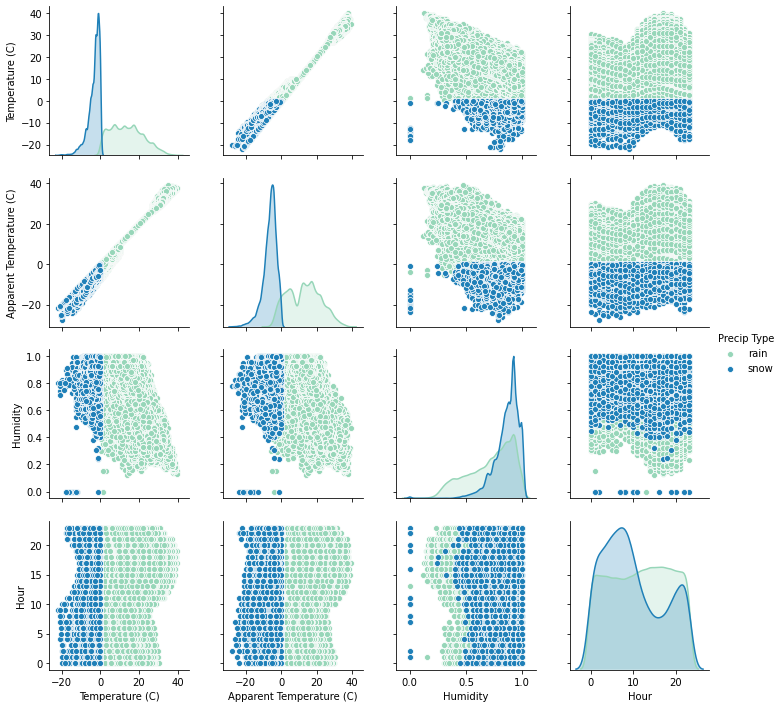

In [39]:
import seaborn as sns
sns.pairplot(weather[["Precip Type","Temperature (C)","Apparent Temperature (C)","Humidity","Hour"]],
             hue="Precip Type",
             palette="YlGnBu");

In [65]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

ls = linear_model.LinearRegression()

# Our model will only predict temperature for non-raining/snowing configuration.
# I would recommend you to change 'null' for 'rain' or 'snow' and verify
# quality metrics, and see how efficient the models would be, only by filtering.
data = weather.where(weather['Precip Type'].isin(['rain', 'snow']))
data.dropna(inplace=True)

X = data["Humidity"].values.reshape(-1,1)
y = data["Temperature (C)"].values.reshape(-1,1)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.33, 
                                                    shuffle=True, random_state=0)

In [71]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(64277, 1)
(31659, 1)
(64277, 1)
(31659, 1)


In [72]:
print("Linear Regression")
ls.fit(X_train, y_train)
print("alpha = ",ls.coef_[0])
print("beta = ",ls.intercept_)
print("\n\nCalculating some regression quality metrics, which we'll discuss further on next notebooks")
y_pred = ls.predict(X_test)
print("MSE = ",mean_squared_error(y_test, y_pred))
print("R2 = ",r2_score(y_test, y_pred))

Linear Regression
alpha =  [-30.81828186]
beta =  [34.60621678]


Calculating some regression quality metrics, which we'll discuss further on next notebooks
MSE =  55.00788538284415
R2 =  0.4007366025306286
